In [ ]:
import numpy as np
def to_pyoung (x):
  y = x * 0.3025
  return np.round(y)

In [ ]:
to_pyoung(106)

32.0

In [ ]:
M2 = np.array([60,80,93,106,119], dtype=float)
Pyoung = np.array([18,24,28,32,36], dtype=float)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(units=1, input_shape=[1]))

In [ ]:
moedl = Sequential([
                    Dense(units=1, input_shape=[1])
])

In [ ]:
model.compile(loss='mean_squared_error',
              optimizer='adam')

In [ ]:
history = model.fit(M2, Pyoung, epochs=5000, verbose=0)

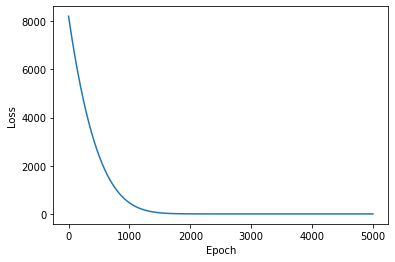

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.plot(history.history['loss'])
plt.show()

In [ ]:
print(model.predict([135.0]))

[[41.04463]]


In [ ]:
print(model.predict([199.0]))

[[60.903652]]


In [ ]:
print("모델의 가중치: {}".format(model.get_weights()))

모델의 가중치: [array([[0.31029725]], dtype=float32), array([-0.8455026], dtype=float32)]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
train_labels.shape, train_labels.shape

((60000,), (60000,))

In [ ]:
train_labels, test_labels

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8),
 array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

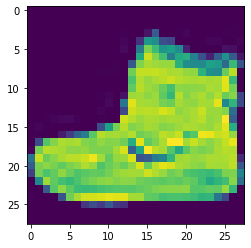

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[0])
plt.grid(False)
plt.show()

In [ ]:
print(train_labels[0])

9


In [ ]:
train_images = train_images /255
test_images = test_images /255

In [ ]:
model = Sequential([
                    Flatten(input_shape=(28,28)),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_images, train_labels, epochs= 10, validation_split=0.25)

Epoch 1/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.5216 - accuracy: 0.8171 - val_loss: 0.4147 - val_accuracy: 0.8516
Epoch 2/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3923 - accuracy: 0.8598 - val_loss: 0.3811 - val_accuracy: 0.8622
Epoch 3/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3489 - accuracy: 0.8718 - val_loss: 0.3538 - val_accuracy: 0.8717
Epoch 4/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3251 - accuracy: 0.8792 - val_loss: 0.3481 - val_accuracy: 0.8742
Epoch 5/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3052 - accuracy: 0.8869 - val_loss: 0.3445 - val_accuracy: 0.8754
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2892 - accuracy: 0.8932 - val_loss: 0.3786 - val_accuracy: 0.8647
Epoch 7/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2776 - accuracy: 0.8973 - val_loss: 0.3381 - val_accuracy:

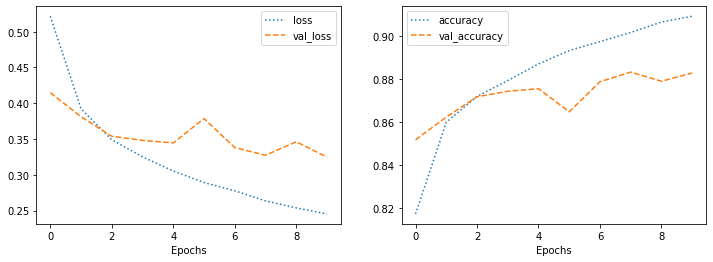

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], linestyle = ":", label='loss')
plt.plot(history.history['val_loss'], linestyle = "--", label='val_loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], linestyle = ":", label='accuracy')
plt.plot(history.history['val_accuracy'], linestyle = "--", label='val_accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.show()

In [ ]:
model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.3528 - accuracy: 0.8746 - 688ms/epoch - 2ms/step


[0.3528363108634949, 0.8745999932289124]

In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[10]

array([3.8126839e-04, 5.0284539e-04, 1.3189496e-01, 3.4066215e-07,
       8.3029932e-01, 5.7712782e-06, 3.6866482e-02, 2.0356877e-08,
       4.8772203e-05, 2.1529823e-07], dtype=float32)

In [ ]:
np.argmax(predictions[10])

4

In [ ]:
test_labels[10]

4

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test /255.0

In [ ]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
model = Sequential([
                    Conv2D(32,(3,3),  input_shape=(28,28,1), activation='relu'),
                    MaxPooling2D(2,2),
                    Conv2D(64,(3,3), activation='relu'),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dropout(0.5),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
checkpoint_path = 'my_checkpoint.ckpt'

checkpoint = ModelCheckpoint(checkpoint_path,
                             save_best_only=True,
                             save_weights_only=True,
                             monitor='val_loss',
                             verbose=1)

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                    epochs=20, batch_size=200, verbose=0,
                    callbacks=[checkpoint]
                    )


Epoch 00001: val_loss improved from inf to 0.44536, saving model to my_checkpoint.ckpt

Epoch 00002: val_loss improved from 0.44536 to 0.37783, saving model to my_checkpoint.ckpt

Epoch 00003: val_loss improved from 0.37783 to 0.34293, saving model to my_checkpoint.ckpt

Epoch 00004: val_loss improved from 0.34293 to 0.32708, saving model to my_checkpoint.ckpt

Epoch 00005: val_loss improved from 0.32708 to 0.30076, saving model to my_checkpoint.ckpt

Epoch 00006: val_loss improved from 0.30076 to 0.28545, saving model to my_checkpoint.ckpt

Epoch 00007: val_loss improved from 0.28545 to 0.26716, saving model to my_checkpoint.ckpt

Epoch 00008: val_loss improved from 0.26716 to 0.26222, saving model to my_checkpoint.ckpt

Epoch 00009: val_loss improved from 0.26222 to 0.25983, saving model to my_checkpoint.ckpt

Epoch 00010: val_loss improved from 0.25983 to 0.25156, saving model to my_checkpoint.ckpt

Epoch 00011: val_loss improved from 0.25156 to 0.24321, saving model to my_checkpoi

In [ ]:
model.evaluate(x_test, y_test, verbose=0)

[0.22007973492145538, 0.9194999933242798]

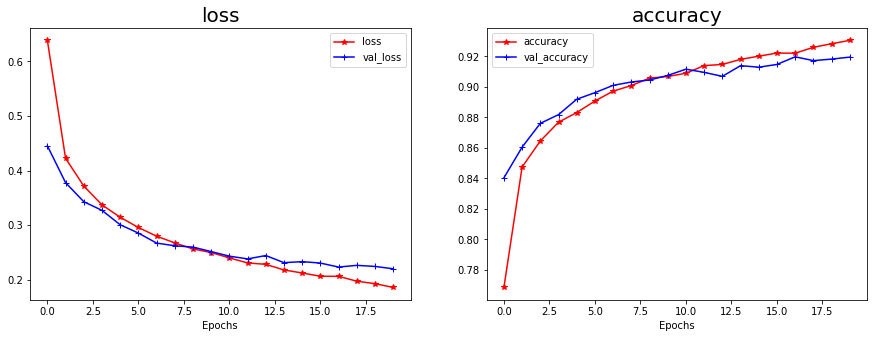

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('loss', fontsize=20)
plt.plot(history.history['loss'], c='red', marker='*', label='loss')
plt.plot(history.history['val_loss'], c='blue', marker='+', label='val_loss')
plt.xlabel('Epochs')
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.title('accuracy', fontsize=20)
plt.plot(history.history['accuracy'], c='red', marker='*', label='accuracy')
plt.plot(history.history['val_accuracy'], c='blue', marker='+', label='val_accuracy')
plt.xlabel('Epochs')
plt.legend(['accuracy', 'val_accuracy'])

plt.show()